# AAE 875 - Fundamentals of OOP and Data Analytics
# Week 5 - Summer 2019

<br>
<br>
<br>

My goal today is to give you a tour of the key Python packages used for **data visualization, descriptive statistics and regression analysis**. I am going to assume that you have already read the corresponding chapters in zyBooks.

The model we are going to run today will explore the cross-sectional infidelity data collected by the magazine Psychology Today in 1969. The economist Ray C. Fair used it the to develop "A Theory of Extramarital Affairs" (Fair, 1978).

The data consists of 601 observations on 9 variables as follows. Please see the original paper for more details. Note that I slightly altered the original data for the purposes of this class:

    Number of observations: 601
    Number of variables: 9
    Variable name definitions:


        sex             : Respondent gender: male or female
        age             : Respondent age
        yrs_married     : Number of years married
        children        : yes or no
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
                        technician, skilled worker, 5 = managerial,
                        administrative, business, 6 = professional with
                        advanced degree
       rate_marriage    : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
       nb_of_affairs    : number of extramarital affairs

    
    See the original paper for more details. 

<br>

Let us first inspect/clean the data and then use the clean version to answer the following questions:

**Data Visualization and Descriptive Statistics** <br>
[1] Of all the people sampled, how many had affairs? How many women had affairs? How many men had affairs?

[2] Plot the age distribution of people who had identified as having at least one affair by sex.

[3] Plot the yrs_married distribution of people who had identified as having at least one affair by sex.

[4] Of all the people that had affairs, how many fall into each education category?

[5] Of all the people that had affairs, how many had children?

[5] For each religious rating, what was the average number of affairs?


**Regression Analysis** <br>
[1] Predict the probability of having an affair using the tools available in Python for discrete choice models (hint: statsmodels.formula.api). First fit a Logit model. Then fit a Tobit model. Can you conclude that the "correct" model is likely the Tobit model? Explain.

## `Step 1: Import packages`
Good practice is to import all packages/modules at the top of your script.

In [1]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline  

## `Step 2: Define functions`

Create function to get only respondents that had affairs

In [2]:
def had_affair_def(data):
    # A function that selects only respondents that had affairs
    #@param: data is a list with all respondents
    #@return: list with respondents that had affairs
    
    had_affair = []  
    data_index = data[0].index("nb_of_affairs")

    for row in data:
        if row[data_index] == 0.0 or row[data_index] == "0":
            continue
        else:
            had_affair.append(row)
            
    return had_affair

In [3]:
def had_affair_m_def(data):
    # A function that selects only male respondents that had affairs
    #@param: data is a list with respondents that had affairs
    #@return: list with male respondents that had affairs
    
    had_affair_m = []
    data_index = data[0].index("sex")
    
    for row in data:
        if row[data_index] == "male":
            had_affair_m.append(row)
            
    return had_affair_m        

In [4]:
def had_affair_f_def(data):
    # A function that selects only female respondents that had affairs
    #@param: data is a list with respondents that had affairs
    #@return: list with female respondents that had affairs
    
    had_affair_f = []
    data_index = data[0].index("sex")
    
    for row in data:
        if row[data_index] == "female":
            had_affair_f.append(row)
            
    return had_affair_f  

## `Step 3: Data cleaning`

### Load data
I decided to work with nested lists. The built-in csv package works just fine for this task. I encourage you to do the same if you want to develop your coding skillls. You can also use a third-party library such as Pandas (Q: what will the data structure be in this case?).

In [5]:
# open the file
csvfile = open("affairs.csv", "r", newline = "")
# read the file
affairs = list(csv.reader(csvfile, delimiter = ","))

### Print columns names and the first 5 rows of data
Do not attempt to run a regression model before insepecting/cleaning your data. Data is messy most of the time! Fix issues (e.g. missing values) before you think about an econometric model. <br>

Hint: use print() statements from place to place to explain what you are doing or what is the output of specific blocks of code.

In [6]:
# print the column names
print("The column names are:\n", affairs[0], "\n")

# print the first 5 rows of data
print("The first 5 rows of data are:")
for row in affairs[1:5+1]:
    print("[", end = " ")
    for cell in row:
        print(cell, end = " ")
    print("]")    

The column names are:
 ['x', 'sex', 'age', 'yrs_married', 'children', 'religious', 'education', 'occupation', 'rate_marriage', 'nb_of_affairs'] 

The first 5 rows of data are:
[ na na 37 10 no 3 na 7 4 0 ]
[ 2 female 27 4 no 4 14 6 4 0 ]
[ 3 female 32 15 yes 1 12 1 4 0 ]
[ na na 57 15 na 5 na 6 na na ]
[ 5 male 22 0.75 no 2 17 6 3 0 ]


### Get column indexes (will use them a lot)

In [7]:
index_sex = affairs[0].index("sex")
index_age = affairs[0].index("age")
index_yrs_married = affairs[0].index("yrs_married")
index_children = affairs[0].index("children")
index_religious = affairs[0].index("religious")
index_occupation = affairs[0].index("occupation")
index_educ = affairs[0].index("education")
index_marriage = affairs[0].index("rate_marriage")
index_nb_affairs = affairs[0].index("nb_of_affairs")

### Print the number of rows and the number of columns
The "quality" of your regression estimates depend on the answer to this question.

In [8]:
print("The affairs data has", len(affairs), "rows and", len(affairs[0]),"columns.")

The affairs data has 602 rows and 10 columns.


### Print the data type of each column
Hint: do not run a regression model if you don't understand what data type each column represents... why? it really matters for results interpretation.

In [9]:
iter = 1 #skips the column names
for row_index, row in enumerate(affairs):
    if row_index == 1:
        for cell in row:
            print(type(cell))
print("Important: the csv.reader() method returns a list of strings!")                  

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
Important: the csv.reader() method returns a list of strings!


### Rename the x variable to resp_id
Variable names should be easy to understand. One week from now you won't remember what this "x" stands for.

In [10]:
try:
    index_of_x = affairs[0].index("x")
    affairs[0][index_of_x] = "resp_id"
    print("The variable \"x\" has been renamed to", affairs[0][index_of_x], end = ".")
except ValueError:
    print("Variable \"x\" has already been renamed to resp_id.")   

The variable "x" has been renamed to resp_id.

### Are there any missing values (na's) in the data?
in this data missing values are marked with "na" but missing values can take different forms as well (e.g. blank cell, period (.), Null etc).

In [11]:
try:
    for row_index, row in enumerate(affairs):
        if row_index == 0: #skip row with column names
            continue
        for cell in row:
            if cell == "na":
                raise ValueError("Missing value in cell.")
except ValueError as excpt:
    print(excpt)

Missing value in cell.


### Print rows with missing values (na's)
This step helps you inspect what is actually missing from each row. How critical is the missing information?

In [12]:
row_index_tbr = []  #tbr stands for to be removed
print("Printing rows with missing values:")
for row_index, row in enumerate(affairs):
    if row_index == 0: #skip row with column names
        continue
    for cell_index, cell in enumerate(row):
        if cell == "na":
            print(row)
            row_index_tbr.append(row_index)
            break   
            
print("\nRow indexes with missing values are:\n", row_index_tbr)

Printing rows with missing values:
['na', 'na', '37', '10', 'no', '3', 'na', '7', '4', '0']
['na', 'na', '57', '15', 'na', '5', 'na', '6', 'na', 'na']

Row indexes with missing values are:
 [1, 4]


### Remove rows with missing values (na's)
You decide what you do with missing values. If you have lots of data removing a couple of rows won't be an issue; otherwise you need to think twice what to do with missing values (e.g. use an imputation method).

For this data I decided to drop the two observations with na's.

In [13]:
temp_affairs = [] # empty list. I will create a new nested list equal with affairs but rows to be removed
n = 1

for row_index, row in enumerate(affairs):
    if row_index in row_index_tbr: #skip rows to be removed (tbr)
        print(n,"row(s) less")
        n += 1 # count number of rows skipped
        continue
    temp_affairs.append(row)
    
# just to check everything looks OK print the first 5 rows of data 
# hint we already know that rows 1 an 4 had missing values
print("\nThe first 5 rows of data are:")
for row in range(1,6):
    print(temp_affairs[row])   

1 row(s) less
2 row(s) less

The first 5 rows of data are:
['2', 'female', '27', '4', 'no', '4', '14', '6', '4', '0']
['3', 'female', '32', '15', 'yes', '1', '12', '1', '4', '0']
['5', 'male', '22', '0.75', 'no', '2', '17', '6', '3', '0']
['6', 'female', '32', '1.5', 'no', '2', '17', '5', '5', '0']
['7', 'female', '22', '0.75', 'no', '2', '12', '1', '3', '0']


### Keep only one reader (data) object
Given that the loop above works as desired we can now overwrite the affairs data.

In [14]:
affairs = temp_affairs
del temp_affairs

### What is the number of rows and columns now?

Final check that data cleaning worked as desired.

In [15]:
print("The affairs data has", len(affairs), "rows and", len(affairs[0]),"columns.")

The affairs data has 600 rows and 10 columns.


### Change column data types
As you can immagine doing data visuzalization, descriptive statistics and regression analysis with string only data types is not really a good idea. Let's change the types of our columns as follows:
* type([resp_id, age, yrs_married, religious, education, occupation, rate_marriage, nb_of_affairs]) = int
* type([sex, children]) = string (Note: nothing to change here; right now all the elements in affairs are strings)


In [16]:
# let's firt find the indexes of the columns that are strings
print("Index of variable \"sex\" in column names is", index_sex, end = ".\n")
print("Index of variable \"children\" in column names is", index_children, end = ".\n")


# change the type of all other columns to float
for row_index, row in enumerate(affairs):
    #print(row_index)
    if row_index == 0:
        continue
    if row_index == 38: # for some reason this line of data cannot be trnsformed to integer
        continue
    for cell_index, cell in enumerate(row):
        if cell_index == index_sex or cell_index == index_children:
            continue
        else:
            affairs[row_index][cell_index] = float(cell)
            
# check that execution worked as planed (print types of the first row of data)
for row_index, row in enumerate(affairs):
    if row_index == 1:
        for cell in row:
            print(type(cell))

Index of variable "sex" in column names is 1.
Index of variable "children" in column names is 4.
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


### Print the number of rows and columns in the data - yes, again
Note: I eliminated one more observation. For some reason the data type transformation got stuck at line 38? can you figure out why? 

In [17]:
print("The affairs data has", len(affairs), "rows and", len(affairs[0]),"columns.")

The affairs data has 600 rows and 10 columns.


<br>


## `Step 4: Data visualization/statistics`

### Of all the people sampled, how many had affairs? How many men had affairs? How many women had affairs?

Let's first see how many respondents had affairs

In [18]:
# total number
had_affair = had_affair_def(affairs)

print("The total number of respondents that had affairs is:", len(had_affair) - 1)

The total number of respondents that had affairs is: 150


How many men had affairs?

In [19]:
had_affair_m = had_affair_m_def(had_affair)
print("The total number of men that had affairs is:", len(had_affair_m) - 1)

The total number of men that had affairs is: 77


How many women had affairs?

In [20]:
had_affair_f = had_affair_f_def(had_affair)
print("The total number of women that had affairs is:", len(had_affair_f) - 1)

The total number of women that had affairs is: 71


Let's plot a graph for better data visualization

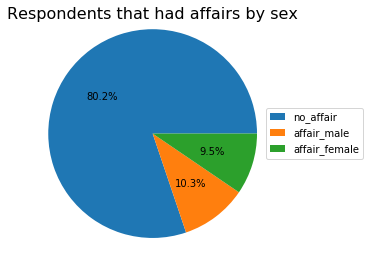

In [21]:
# data to plot on a pie chart
labels = ["no_affair", "affair_male", "affair_female"]
sizes = [len(affairs) - 1, len(had_affair_m) - 1, len(had_affair_f) - 1]

# plot
handle, texts, autotexts = plt.pie(sizes, autopct = '%1.1f%%', radius = 1.2)

# title
plt.title('Respondents that had affairs by sex', fontsize = 16)

# legend
plt.legend(handle, labels,
           loc = "center left",
           bbox_to_anchor=(1, 0, 0.5, 1), 
           handlelength = 1.5);

### Plot the age distribution of people who had identified as having at least one affair by sex.

Get age distribution for male

In [22]:
age_m = []
for row in had_affair_m:
    age_m.append(row[index_age])  

Plot age distribution for male, with kernel density estimate

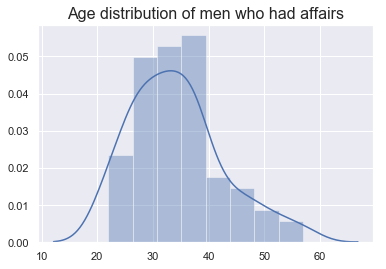

In [23]:
sns.set()
sns.set_color_codes()
sns.distplot(age_m, color = 'b')

plt.title("Age distribution of men who had affairs", fontsize = 16);

Get age distribution for female

In [24]:
age_f = []

for row in had_affair_f:
    age_f.append(row[index_age])  

Plot age distribution for female, with kernel density estimate

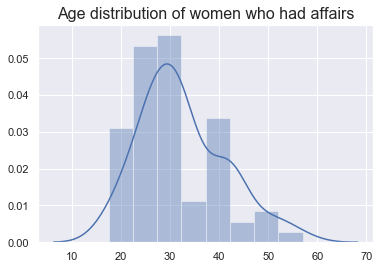

In [25]:
sns.set()
sns.set_color_codes()
sns.distplot(age_f, color = 'b')

plt.title("Age distribution of women who had affairs", fontsize = 16);

### Plot the yrs_married distribution of people who had identified as having at least one affair by sex.

Get yrs_married distribution for male

In [26]:
yrs_married_m = []

for row in had_affair_m:
    yrs_married_m.append(row[index_yrs_married])

Plot yrs_married distribution for male, with kernel density estimate

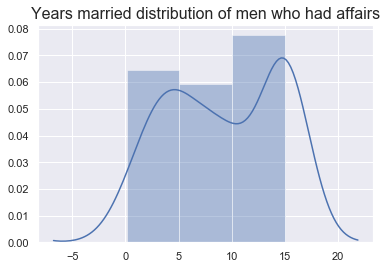

In [27]:
sns.set()
sns.set_color_codes()
sns.distplot(yrs_married_m, color = 'b')

plt.title("Years married distribution of men who had affairs", fontsize = 16);

Get yrs_married distribution for female

In [28]:
yrs_married_f = []

for row in had_affair_f:
    yrs_married_f.append(row[index_yrs_married])

Plot yrs_married distribution for female, with kernel density estimate

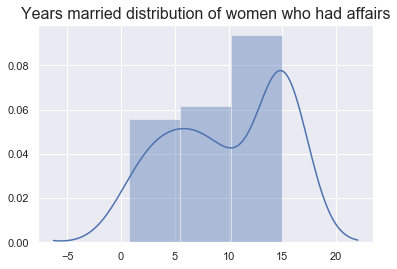

In [29]:
sns.set()
sns.set_color_codes()
sns.distplot(yrs_married_f, color = 'b')

plt.title("Years married distribution of women who had affairs", fontsize = 16);

### Of all the people that had affairs, how many fall into each education category?

First let's count number of respondents for each education category

In [30]:
count_grade_school = 0
count_high_school = 0
count_some_college = 0
count_college_graduate = 0
count_some_grad_school = 0
count_advanced_degree = 0

for row_index, row in enumerate(had_affair):
    if row[index_educ] == 9:
        count_grade_school += 1
    if row[index_educ] == 12:
        count_high_school += 1
    if row[index_educ] == 14:
        count_some_college += 1
    if row[index_educ] == 16:  
        count_college_graduate += 1
    if row[index_educ] == 17:
        count_some_grad_school += 1
    if row[index_educ] == 20:
        count_advanced_degree += 1

Plot a pie chart to visualize the statistics

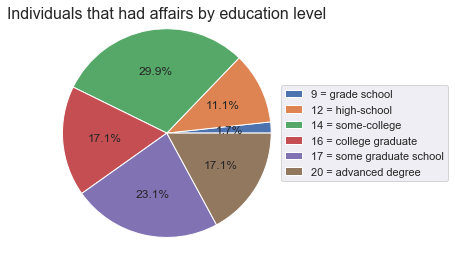

In [31]:
# data to plot on a pie chart
labels = ["9 = grade school", "12 = high-school", 
          "14 = some-college", "16 = college graduate",
          "17 = some graduate school", "20 = advanced degree"
         ]

sizes = [count_grade_school, count_high_school,
         count_some_college, count_college_graduate,
         count_some_grad_school, count_advanced_degree
        ]

# plot
handle, texts, autotexts = plt.pie(sizes, autopct = '%1.1f%%', radius = 1.2)

# title
plt.title("Individuals that had affairs by education level", fontsize = 16)

# legend
plt.legend(handle, labels,
          loc = "center left",
          bbox_to_anchor=(1, 0, 0.5, 1), 
          handlelength = 1.5);

### Of all the people that had affairs, how many had children?

We first want to know the number of respondents that had children

In [32]:
count_had_children = 0
for row in had_affair:
    if row[index_children] == "no":
        continue
    else:
        count_had_children += 1  

We can now plot a pie chart

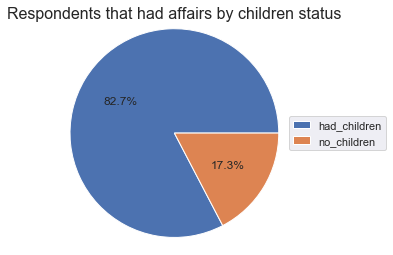

In [33]:
# data to plot on a pie chart
labels = ["had_children", "no_children"]
sizes = [count_had_children, len(had_affair) - count_had_children - 1]


# plot
handle, texts, autotexts = plt.pie(sizes, autopct = '%1.1f%%', radius = 1.2)

# title
plt.title('Respondents that had affairs by children status', fontsize = 16)

# legend
plt.legend(handle, labels,
           loc = "center left",
           bbox_to_anchor=(1, 0, 0.5, 1), 
           handlelength = 1.5);

### For each religious rating, what was the average number of affairs?

Create empty variables for (1) total number of affairs by religion, and (2) respondents count by religion

In [34]:
total_affairs_not = 0
count_not = 0

total_affairs_mildly = 0
count_mildly = 0

total_affairs_fairly = 0
count_fairly = 0

total_affairs_strongly = 0
count_strongly = 0

# populate variables by reading the data
for row in had_affair:
    if row[index_religious] == 1:
        total_affairs_not += row[index_nb_affairs]
        count_not += 1
        
    if row[index_religious] == 2:
        total_affairs_mildly += row[index_nb_affairs]
        count_mildly += 1
        
    if row[index_religious] == 3: 
        total_affairs_fairly += row[index_nb_affairs]
        count_fairly += 1
        
    if row[index_religious] == 4: 
        total_affairs_strongly += row[index_nb_affairs]
        count_strongly += 1

# compute the means
mean_not = round(total_affairs_not/count_not)
mean_mildly = round(total_affairs_mildly/count_mildly)
mean_fairly = round(total_affairs_fairly/count_fairly)
mean_strongly = round(total_affairs_strongly/count_strongly)

Let's plot the statistics now using a bar plot

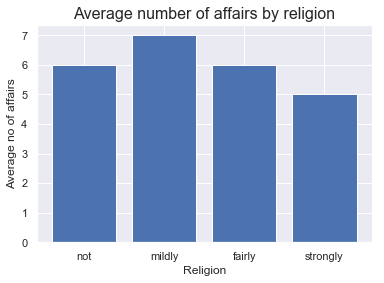

In [35]:
# data to plot on a bar
religion = ["not", "mildly", "fairly", "strongly"]
mean_affairs = [mean_not, mean_mildly, mean_fairly, mean_strongly]

# plot
plt.bar(religion, mean_affairs)

# title
plt.title('Average number of affairs by religion', fontsize = 16)

# axes
plt.xlabel("Religion")
plt.ylabel("Average no of affairs");


## `Step 5: Regression Analysis`

### Predict the probability of having an affair using the tools available in Python for discrete choice models

#### Fit a Logit model

#### Fit a Tobit model